## Regression for Scikit_learn


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# other
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
# import dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# how to create two columns x and y
df_linear = df[['age', 'fare']]
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [4]:
# simple linear regression model
# x feature always wil be in double brackets/ dimension
x = df[['age']]
y = df['fare']

In [5]:
# lets check for null values
x.isnull().sum() / len(x)  # checking null values in x


age    0.198653
dtype: float64

In [6]:
# before proceeding we have to handle null values
x ['age'] = x['age'].fillna(x['age'].mean())

C:\Users\USER\AppData\Local\Temp\ipykernel_9560\2785658515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x ['age'] = x['age'].fillna(x['age'].mean())


In [7]:
x

,age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [8]:
x.age.fillna(value=x['age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [9]:
x.isnull().sum() / len(x) *100  # checking null values in x

age    0.0
dtype: float64

In [10]:
x.shape

(891, 1)

In [ ]:
# another way to fill null values
df_linear.age.fillna(value=df_linear['age'].mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_9560\3808235274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.age.fillna(value=df_linear['age'].mean(), inplace=True)


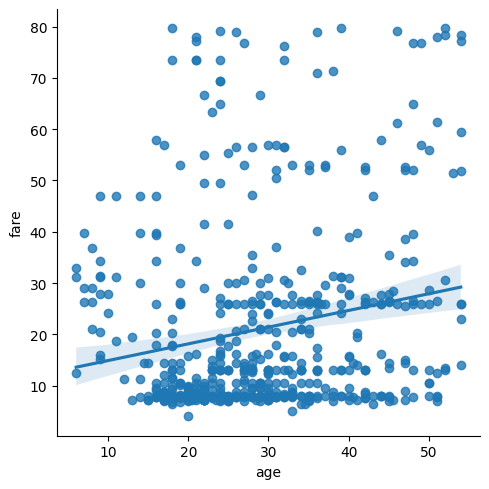

In [24]:
# lets create the lm plot of age vs fare
sns.lmplot(x='age', y='fare', data=df_linear)

<Axes: ylabel='age'>

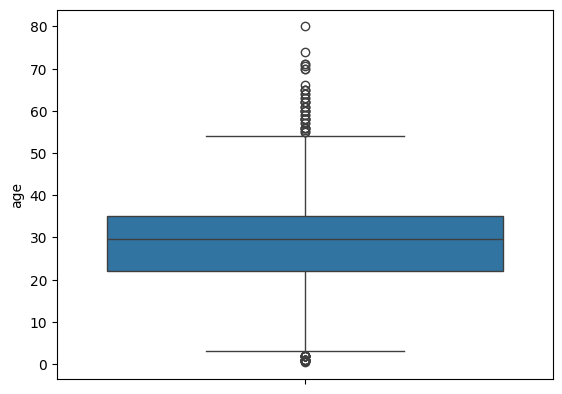

In [17]:
# lets create boxplot
sns.boxplot(y='age', data=df_linear)

In [19]:
# lets remove the outliers from age column
df_linear = df_linear[(df['age'] > 5 ) & (df['age'] < 55)]

<Axes: ylabel='age'>

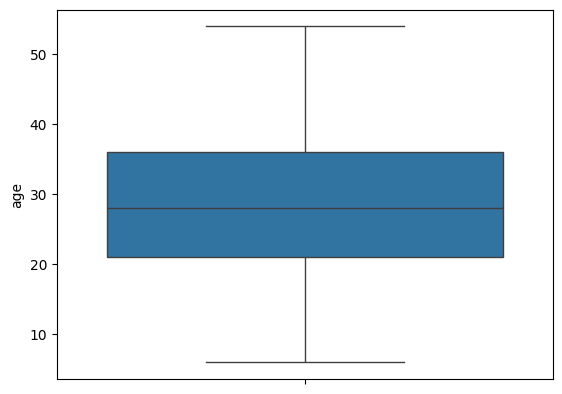

In [20]:
# lets again create boxplot
sns.boxplot(y='age', data=df_linear)

<Axes: ylabel='fare'>

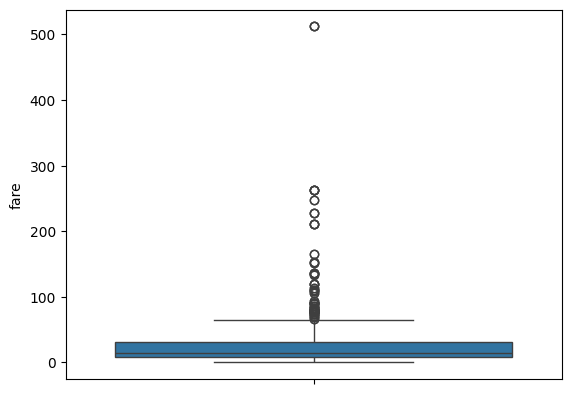

In [21]:
# lets create the fare box plot
sns.boxplot(y='fare', data=df_linear)

In [22]:
# lets remove the outliers from fare column
df_linear = df_linear[(df_linear['fare'] > 1 ) & (df_linear['fare'] < 80)]

In [23]:
x = df_linear[['age']]
y = df_linear['fare']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# let call the model
model = LinearRegression()

# let train the model
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# lets predict the model
model.predict([[25]])

c:\Users\USER\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.77149501])

In [29]:
# lets predict the model
model.predict([[55]])

c:\Users\USER\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29.53234632])

In [30]:
# model evaluation with metrics

# r2 score
# mean absolute error
# MAE = mean absolute error
# rmse = root mean square error


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)

In [31]:
x_train.shape

(112, 1)

In [32]:
x_test.shape

(449, 1)

In [33]:
x.shape

(561, 1)

In [ ]:
# model evaluation with metrics

# r2 score
# mean absolute error
# MAE = mean absolute error
# rmse = root mean square error


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)

# lets evaluate the model
model = LinearRegression()


# lets train the model 
# it will just used for training purpose or accuracy purpose not for predicting purpose
model.fit(x_train, y_train)

# lets predict the model
prediction = model.predict(x_test)



<Axes: xlabel='fare'>

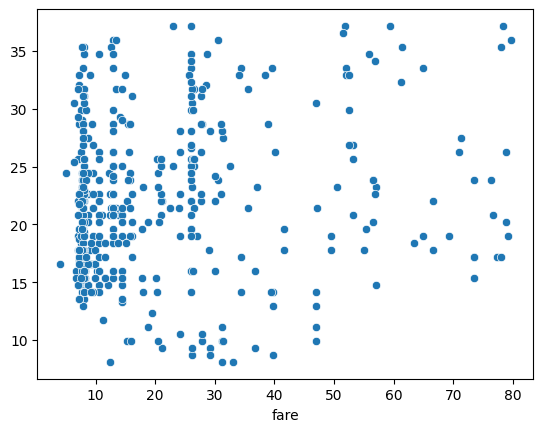

In [ ]:
# lets compare the actual vs predicted
sns.scatterplot(x=y_test, y=prediction)

# its accuraccy is not correct 

In [39]:
# lets check the accuracy of the model
model.score(x_test, y_test)

-0.025987280312277594

In [54]:
# lets import metrics for evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_true=y_test, y_pred= prediction)
MSE = mean_squared_error(y_true=y_test, y_pred= prediction)
R2 = r2_score(y_true=y_test, y_pred= prediction)

# print the evaluation metrics
print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("R2 Score:", R2)

Mean Absolute Error: 13.77710551719156
Mean Squared Error: 321.2945662430018
R2 Score: -0.025987280312277594


In [55]:
# lets import numqpy for rmse
import numpy as np
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 17.92469152434713
